In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

# Sample data

In [67]:
from sklearn.datasets import fetch_openml
data = fetch_openml("house_sales", as_frame=True)
print(data.DESCR)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name house_sales exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: https://www.kaggle.com/harlfoxem/  
https://www.kaggle.com/harlfoxem/  
**Source**: [original](https://www.kaggle.com/harlfoxem/housesalesprediction) - 2016-08-25  
**Please cite**:   

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It contains 19 house features plus the price and the id columns, along with 21613 observations.
It's a great dataset for evaluating simple regression models.

* Id: Unique ID for each home sold
* Date: Date of the home sale
* Price: Price of each home sold
* Bedrooms: Number of bedrooms
* Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* Sqft_living: Square footage of the apartments interior living space
* Sqft_lot: Square footage of the land space
* Floors: Number of floors
* Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
* View: An index from 0 to 4 of how good the view 

In [68]:
data.frame

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [69]:
data.frame.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [70]:
df = data.frame.drop(['date', 'price', 'zipcode'], axis=1)
target = data.frame.price

In [71]:
X, y = df, target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [72]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21613, 17), (21613,), (16209, 17), (5404, 17), (16209,), (5404,))

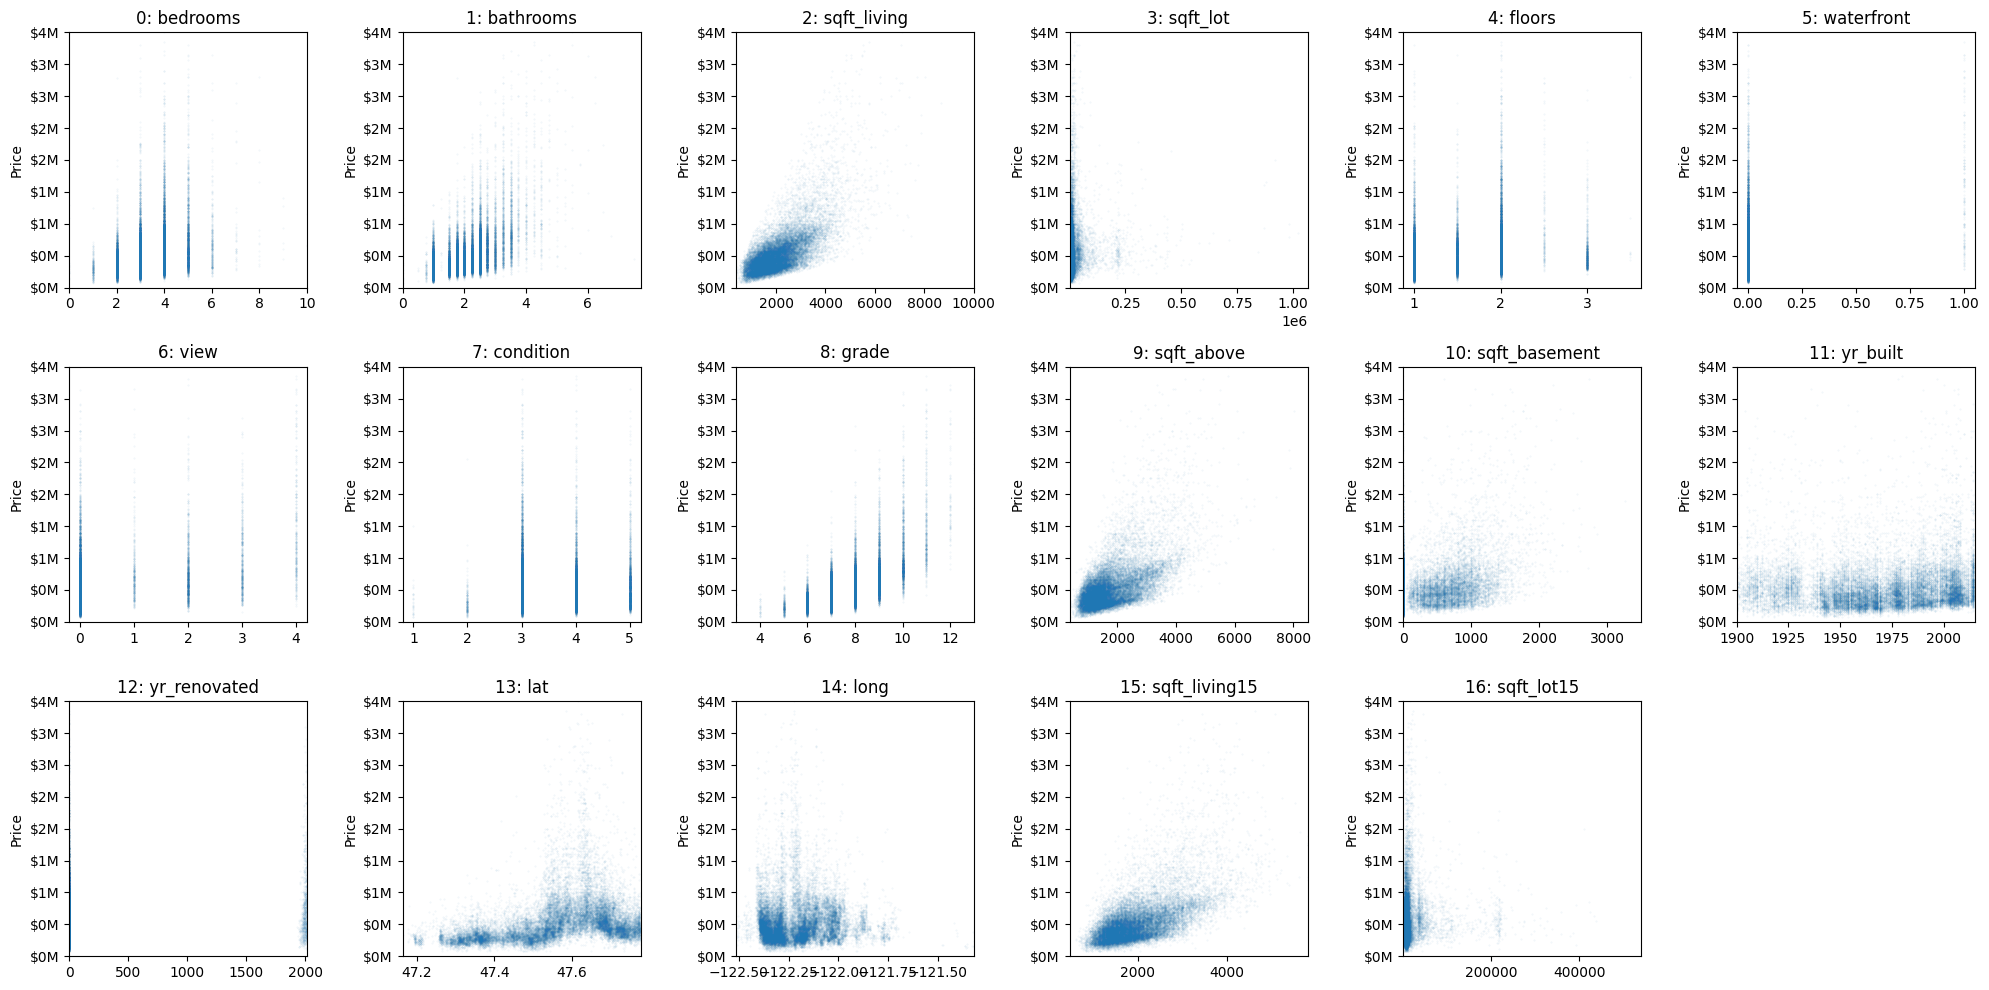

In [7]:
# FuncFormatter can be used as a decorator
# import matplotlib.ticker as ticker

# @ticker.FuncFormatter
def million_formatter(x, pos):
    return f"${int(x / 10 ** 6)}M"


fig, axes = plt.subplots(3, 6, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 16:
        ax.set_visible(False)
        continue
    X_col = X.iloc[:, i]
    ax.yaxis.set_major_formatter(million_formatter)
    # set ticks to disregard outliers
    ax.set_ylim(0, 4000000)
    if X_col.nunique() > 10:
        ax.set_xlim(X_col.quantile(q=.0001), X_col.quantile(q=.9999))
    ax.scatter(X_col, y, alpha=.1, s=.1)
    ax.set_title("{}: {}".format(i, X.columns[i]))
    ax.set_ylabel("Price")
plt.tight_layout()

# Scale

<Axes: >

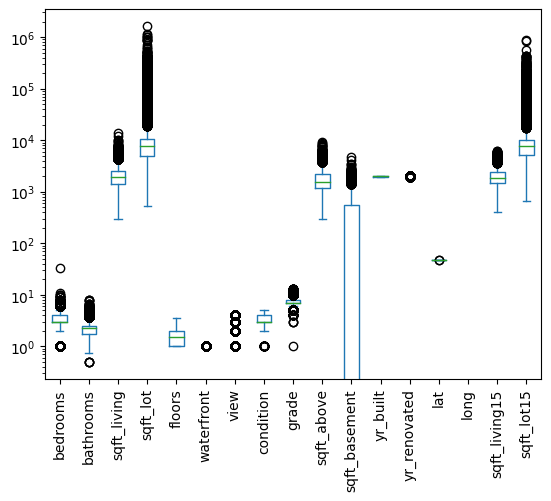

In [21]:
X.plot(kind='box', rot=90, logy=True)

In [22]:
def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None, alpha=1):
    # multiclass
    if eps is None:
        eps = X.std(axis=0) / 2.
    else:
        eps = np.array([eps, eps])

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps[0], X[:, 0].max() + eps[0]
    y_min, y_max = X[:, 1].min() - eps[1], X[:, 1].max() + eps[1]
    # these should be 1000 but knn predict is unnecessarily slow
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    decision_values = classifier.predict(X_grid)
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,
                                                       y_min, y_max),
            aspect='auto', origin='lower', alpha=alpha, cmap=plt.cm.bwr)

Text(0.5, 1.0, 'KNN with scaling')

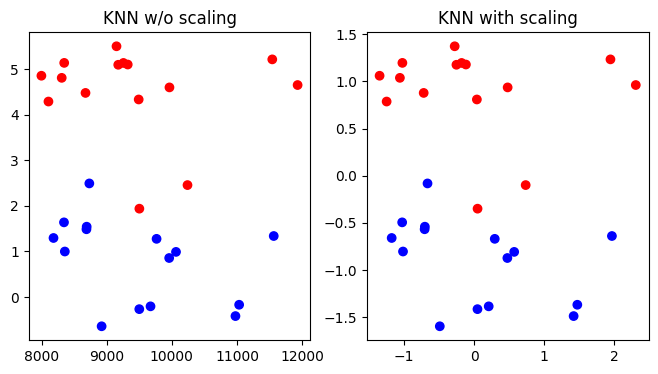

In [44]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

X, y = make_blobs(centers=2, random_state=4, n_samples=30)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))


X = X * np.array([1000, 1])

knn = KNeighborsClassifier(algorithm='kd_tree').fit(X, y)

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
axes[0].set_title("KNN w/o scaling")


X_scaled = scale(X)
knn_scaled = KNeighborsClassifier(algorithm='kd_tree').fit(X_scaled, y)

axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr')
axes[1].set_title("KNN with scaling")



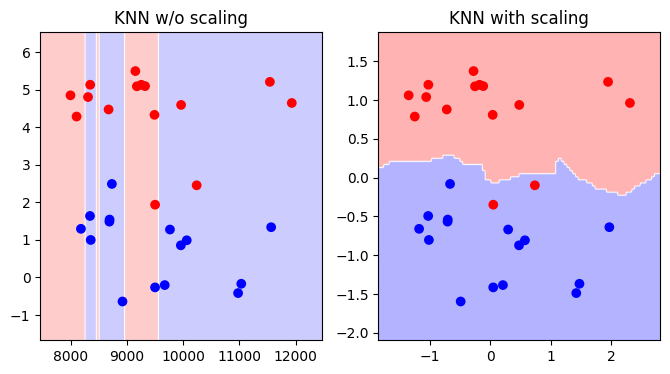

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
axes[0].set_title("KNN w/o scaling")

axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr')
axes[1].set_title("KNN with scaling")

plot_2d_classification(knn, X, ax=axes[0], alpha=.2)
plot_2d_classification(knn_scaled, X_scaled, ax=axes[1], alpha=.3)


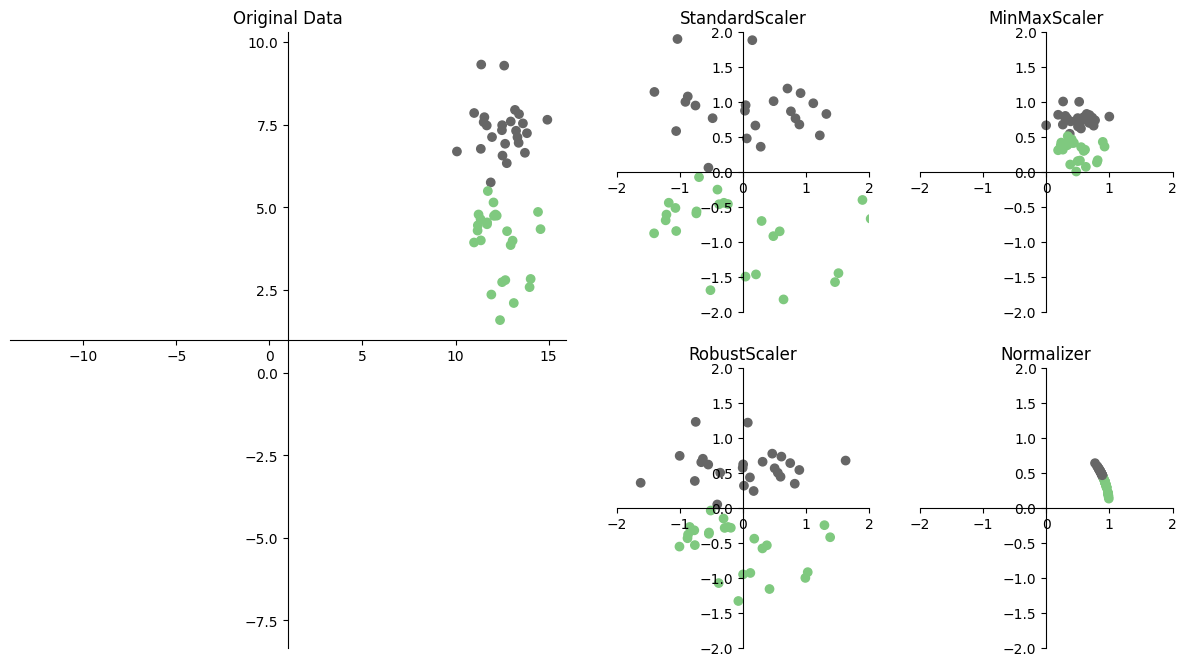

In [47]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.figure(figsize=(15, 8))
main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()

main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("Original Data")
other_axes = [plt.subplot2grid((2, 4), (i, j))
              for j in range(2, 4) for i in range(2)]

for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                   MinMaxScaler(), Normalizer(norm='l2')]):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap="Accent")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__)

other_axes.append(main_ax)

for ax in other_axes:
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')


In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [53]:
scores = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.49987731810318536, 0.03872958666703703)

In [54]:
scores = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7861129070862145, 0.029390374695740285)

# Information Leakage Error

In [58]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
X_test = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))
y_test = rnd.normal(size=(100,))

In [62]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5)
select.fit(X, y)
X_selected = select.transform(X)
print(X_selected.shape)

(100, 500)


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
np.mean(cross_val_score(Ridge(), X_selected, y))

0.915748217091093

In [64]:
ridge = Ridge().fit(X_selected, y)
X_test_selected = select.transform(X_test)
ridge.score(X_test_selected, y_test)

-0.041340744506775495

# Pipelines

In [74]:
from sklearn.linear_model import Ridge
X, y = df, target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [75]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6841700239383453

In [76]:
pipe.steps

[('standardscaler', StandardScaler()), ('ridge', Ridge())]

In [79]:
from sklearn.pipeline import Pipeline
pipe = Pipeline((("scaler", StandardScaler()),
                 ("regressor", Ridge())))
pipe.steps

(('scaler', StandardScaler()), ('regressor', Ridge()))

In [80]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6841700239383453

In [83]:
from sklearn.model_selection import GridSearchCV

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 8}
0.7784265150002474


# Categorical Variables

In [87]:
import pandas as pd
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df

,boro,salary,vegan
0,Manhattan,103,No
1,Queens,89,No
2,Manhattan,142,No
3,Brooklyn,54,Yes
4,Brooklyn,63,Yes
5,Bronx,219,No


In [88]:
df['boro_ordinal'] = df.boro.astype("category").cat.codes
# reorder columns so it looks nice
df = df[['boro', 'boro_ordinal', 'salary', 'vegan']]
df

,boro,boro_ordinal,salary,vegan
0,Manhattan,2,103,No
1,Queens,3,89,No
2,Manhattan,2,142,No
3,Brooklyn,1,54,Yes
4,Brooklyn,1,63,Yes
5,Bronx,0,219,No


<Axes: xlabel='boro_ordinal', ylabel='vegan'>

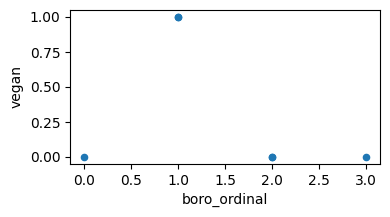

In [89]:
df_int = df.copy()
df_int['vegan'] = df.vegan.astype("category").cat.codes
plt.figure(figsize=(4, 2))
df_int.plot(x='boro_ordinal', y='vegan', kind='scatter', ax=plt.gca())

In [90]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(df[['boro_ordinal']], df.vegan)
lr.coef_

array([[-0.45784715]])

In [91]:
lr.intercept_

array([-0.03782071])

In [92]:
dec = lr.decision_function(np.linspace(0, 3).reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [93]:
lr.predict(np.linspace(0, 3).reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No'], dtype=object)

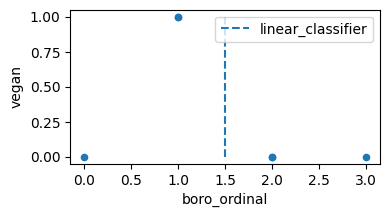

In [94]:
plt.figure(figsize=(4, 2))
df_int.plot(x='boro_ordinal', y='vegan', kind='scatter', ax=plt.gca())
plt.vlines([1.5], 0, 1, linestyle='--', label='linear_classifier')
plt.legend(loc='best')

In [95]:
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df

,boro,salary,vegan
0,Manhattan,103,No
1,Queens,89,No
2,Manhattan,142,No
3,Brooklyn,54,Yes
4,Brooklyn,63,Yes
5,Bronx,219,No


In [96]:
pd.get_dummies(df)

,salary,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens,vegan_No,vegan_Yes
0,103,0,0,1,0,1,0
1,89,0,0,0,1,1,0
2,142,0,0,1,0,1,0
3,54,0,1,0,0,0,1
4,63,0,1,0,0,0,1
5,219,1,0,0,0,1,0


In [97]:
pd.get_dummies(df, columns=['boro'])

,salary,vegan,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,103,No,0,0,1,0
1,89,No,0,0,0,1
2,142,No,0,0,1,0
3,54,Yes,0,1,0,0
4,63,Yes,0,1,0,0
5,219,No,1,0,0,0


In [98]:
df_ordinal = df.copy()
df_ordinal['boro'] = df.boro.astype("category").cat.codes
df_ordinal

,boro,salary,vegan
0,2,103,No
1,3,89,No
2,2,142,No
3,1,54,Yes
4,1,63,Yes
5,0,219,No


In [99]:
pd.get_dummies(df_ordinal, columns=['boro'])

,salary,vegan,boro_0,boro_1,boro_2,boro_3
0,103,No,0,0,1,0
1,89,No,0,0,0,1
2,142,No,0,0,1,0
3,54,Yes,0,1,0,0
4,63,Yes,0,1,0,0
5,219,No,1,0,0,0


In [100]:
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df_dummies = pd.get_dummies(df, columns=['boro'])
display(df_dummies)

,salary,vegan,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,103,No,0,0,1,0
1,89,No,0,0,0,1
2,142,No,0,0,1,0
3,54,Yes,0,1,0,0
4,63,Yes,0,1,0,0
5,219,No,1,0,0,0


In [101]:
df = pd.DataFrame({'boro': ['Brooklyn', 'Manhattan', 'Brooklyn', 'Queens', 'Brooklyn', 'Staten Island'],
                   'salary': [61, 146, 142, 212, 98, 47],
                   'vegan': ['Yes', 'No','Yes','No', 'Yes', 'No']})
df_dummies = pd.get_dummies(df, columns=['boro'])
display(df_dummies)

,salary,vegan,boro_Brooklyn,boro_Manhattan,boro_Queens,boro_Staten Island
0,61,Yes,1,0,0,0
1,146,No,0,1,0,0
2,142,Yes,1,0,0,0
3,212,No,0,0,1,0
4,98,Yes,1,0,0,0
5,47,No,0,0,0,1


In [102]:
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
# predefine the category
df['boro'] = pd.Categorical(df.boro, categories=['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'])
df_dummies = pd.get_dummies(df, columns=['boro'])
display(df_dummies)

,salary,vegan,boro_Manhattan,boro_Queens,boro_Brooklyn,boro_Bronx,boro_Staten Island
0,103,No,1,0,0,0,0
1,89,No,0,1,0,0,0
2,142,No,1,0,0,0,0
3,54,Yes,0,0,1,0,0
4,63,Yes,0,0,1,0,0
5,219,No,0,0,0,1,0


In [127]:
from sklearn.preprocessing import OneHotEncoder
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan',
                            'Brooklyn', 'Brooklyn', 'Bronx']})
ce = OneHotEncoder().fit(df)
ce.transform(df).toarray()

array([[0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.]])

In [125]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression

categorical = df.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))
model = make_pipeline(preprocess, LogisticRegression())